In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-dataset-from-piracy-website/movies_dataset.csv


# Tweet Sentiment's Impact on Stock Returns
## 数据摘要和可视化
### 数据摘要

In [101]:


import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns



* 数据读取和预处理

In [81]:
dataset_path = "/kaggle/input/movies-dataset-from-piracy-website/movies_dataset.csv"
dataset = pd.read_csv(dataset_path)
nominal = ['appropriate_for', 'director',  'industry', 'language', 'writer']
numeric = ['imdb_rating', 'downloads', 'posted_date', 'release_date', 'run_time', 'views']
data = dataset.drop(columns='Unnamed: 0')
data.columns = data.columns.str.replace('-', '_').str.lower()

for col in 'downloads', 'views':
    data[col] = data[col].str.replace(',','')
    data[col] = data[col].astype('float')
# Make id strings.
data['id'] = data['id'].astype('str')
pd.options.display.float_format = '{:.2f}'.format
def run_time_process(e):
    e = str(e).replace(' ', '')
    if e == 'nan':
        return np.nan
    if 'h' not in e and 'min' not in e:
        return int(e)
    else:
        hour = 0
        minute = 0
        if 'h' in e:
            hour = int(e.split('h')[0])
        if 'min' in e:
            minute = int(e.split('min')[0].split('h')[-1])
        return int(hour * 60 + minute)
data['run_time'] = data['run_time'].apply(run_time_process)
data['run_time'] = pd.to_numeric(data['run_time'], errors='coerce').fillna(np.nan)
data['old_posted_date'] = data['posted_date']
data['posted_date'] = pd.to_datetime(data['posted_date'])

data['old_release_date'] = data['release_date']
data['release_date'] = pd.to_datetime(data['release_date'])
dataset=data
dataset.head()

,imdb_rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer,old_posted_date,old_release_date
0,4.80,R,John Swab,304.00,372092,Hollywood / English,English,2023-02-20,2023-01-28,105.00,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.00,John Swab,"20 Feb, 2023",Jan 28 2023
1,6.40,TV-PG,Paul Ziller,73.00,372091,Hollywood / English,English,2023-02-20,2023-02-05,84.00,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.00,John Christian Plummer,"20 Feb, 2023",Feb 05 2023
2,5.20,R,Ben Wheatley,1427.00,343381,Hollywood / English,"English,Hindi",2021-04-20,2021-06-18,107.00,As the world searches for a cure to a disastro...,In the Earth,14419.00,Ben Wheatley,"20 Apr, 2021",Jun 18 2021
3,8.10,NaN,Venky Atluri,1549.00,372090,Tollywood,Hindi,2023-02-20,2023-02-17,139.00,The life of a young man and his struggles agai...,Vaathi,4878.00,Venky Atluri,"20 Feb, 2023",Feb 17 2023
4,4.60,NaN,Shaji Kailas,657.00,372089,Tollywood,Hindi,2023-02-20,2023-01-26,122.00,A man named Kalidas gets stranded due to the p...,Alone,2438.00,Rajesh Jayaraman,"20 Feb, 2023",Jan 26 2023


#### 标称属性：给出每个数据可能的频数
* 标称属性有appropriate_for，director，industry ，language，storyline ，title，writer,其中storyline是不必展示的

In [53]:
nominal = ["appropriate_for","director","industry" ,"language","title","writer"]
for i in nominal:
    print(github_dataset["language"].value_counts())

language
English                                 12657
Hindi                                    2558
English,Spanish                           391
Punjabi                                   310
English,Hindi                             304
                                        ...  
English,Korean,Spanish                      1
Norwegian,Swedish                           1
Spanish,Chinese,English,Maori,French        1
Urdu,Punjabi,English                        1
Spanish,German,English                      1
Name: count, Length: 1167, dtype: int64
language
English                                 12657
Hindi                                    2558
English,Spanish                           391
Punjabi                                   310
English,Hindi                             304
                                        ...  
English,Korean,Spanish                      1
Norwegian,Swedish                           1
Spanish,Chinese,English,Maori,French        1
Urdu,Punjabi,English  

*  因为列表看起来有许多频次很低的取值，所以这里取前六的数据画图展示

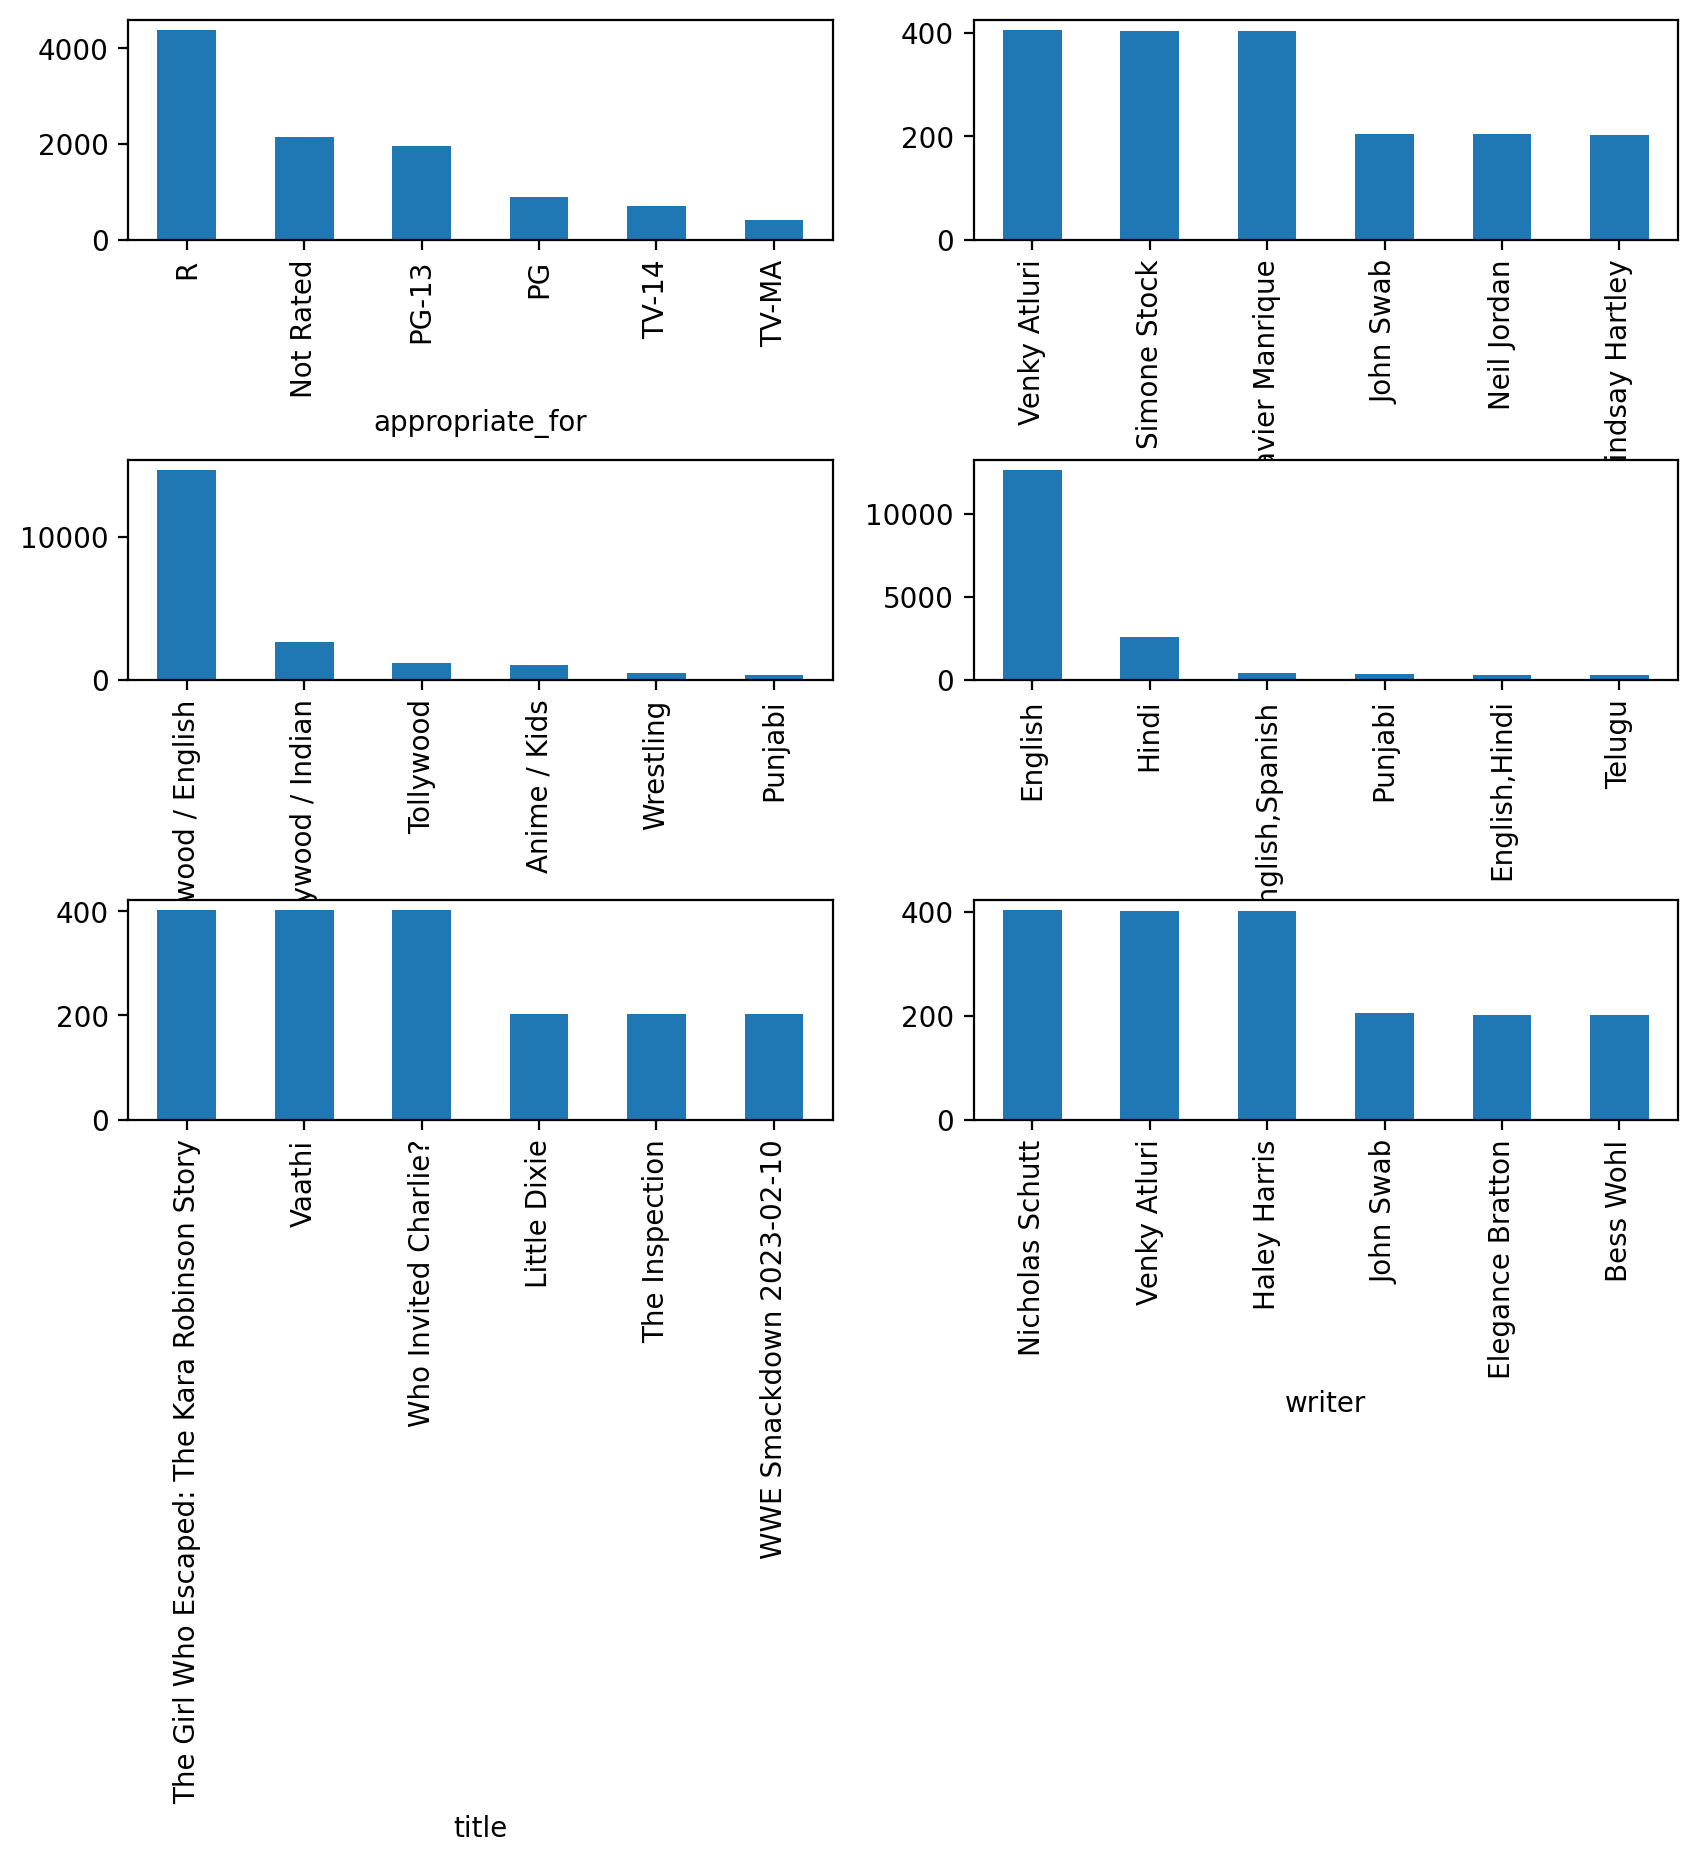

In [ ]:
index = 1
plt.figure(figsize=(10,10), dpi=200).subplots_adjust(hspace=1)
plt.figure(1)
col = 2
row = int(len(nominal) / col) + 1
for i in nominal:
    plt.subplot(row, col, index)
    index += 1
    sum = 6
    dataset[i].value_counts().head(sum).plot.bar()



#### 数值属性：给出5数概括及缺失值的个数
* 数值属性的id是无意义的，我们只要分析IMDb-rating，downloads，posted_date，release_date，run_time，views
* 先对缺失情况进行分析

In [56]:
numeric = ['imdb_rating', 'downloads', 'posted_date', 'release_date', 'run_time', 'views']
Nans = dataset[numeric].isna().sum()
print(Nans)


imdb_rating      841
downloads          1
posted_date        1
release_date       1
run_time        1768
views              1
dtype: int64


* 计算五数属性

In [58]:
# 提取 numeric 列的数据
numeric_data = dataset[numeric]
five_number_summary = numeric_data.describe().loc[['min', '25%', '50%', '75%', 'max']]
summary_table = pd.DataFrame(five_number_summary, columns=numeric)
print(summary_table)

     imdb_rating  downloads          posted_date         release_date  \
min         1.10       0.00  1970-01-01 00:00:00  1921-02-05 00:00:00   
25%         4.80     855.50  2014-06-06 00:00:00  2013-01-18 00:00:00   
50%         5.70    2716.00  2018-05-25 00:00:00  2017-09-29 00:00:00   
75%         6.60   10070.00  2022-01-15 00:00:00  2021-11-05 00:00:00   
max         9.90  391272.00  2023-02-20 00:00:00  2023-09-23 00:00:00   

     run_time      views  
min      2.00     667.00  
25%     90.00    7571.50  
50%    100.00   15222.00  
75%    117.00   36571.00  
max    321.00 1638533.00  


* 画出盒图

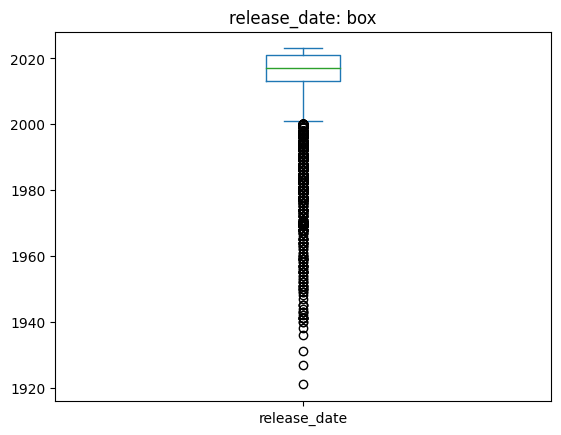

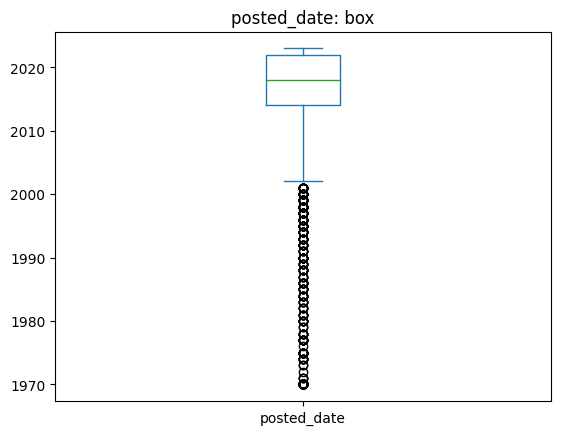

In [64]:
date = ['release_date','posted_date']
for i in date:
    v = pd.DataFrame(dataset[i].dt.year)
    v.plot.box()
    plt.title(f'{i}: box')
    plt.show()

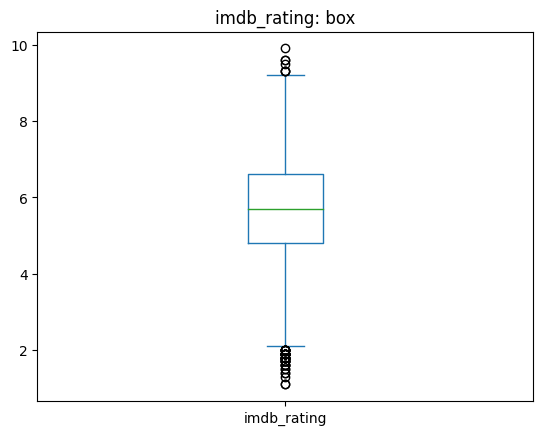

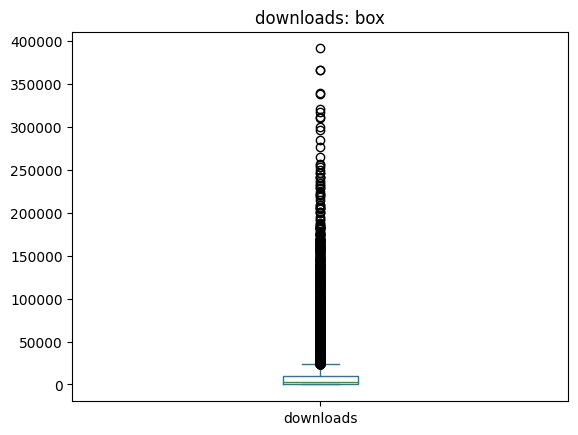

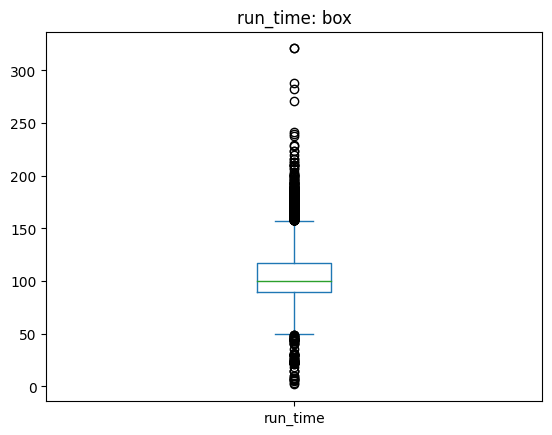

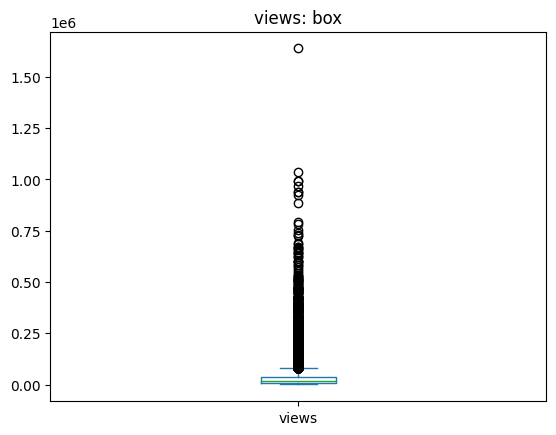

In [65]:
other = ['imdb_rating', 'downloads',  'run_time', 'views']
for i in other:
    v = pd.DataFrame(data[i])
    v.plot.box()
    plt.title(f'{i}: box')
    plt.show()

## 缺失值的处理
### 剔除操作

In [67]:
print("处理之前数据形状：")
print(dataset.shape)
_data = dataset.dropna()
print("处理之前数据形状：")
print(_data.shape)

处理之前数据形状：
(20548, 16)
处理之前数据形状：
(9902, 16)


### 最高频率填补

In [68]:
alls = nominal + numeric
new_data = dataset.copy(deep=True)
for o in alls:
    most = dataset[i].value_counts().index[0]
    new_data[i] = data[i].fillna(most)
new_data.head()

,imdb_rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer,old_posted_date,old_release_date
0,4.80,R,John Swab,304.00,372092,Hollywood / English,English,2023-02-20,2023-01-28,105.00,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.00,John Swab,"20 Feb, 2023",Jan 28 2023
1,6.40,TV-PG,Paul Ziller,73.00,372091,Hollywood / English,English,2023-02-20,2023-02-05,84.00,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.00,John Christian Plummer,"20 Feb, 2023",Feb 05 2023
2,5.20,R,Ben Wheatley,1427.00,343381,Hollywood / English,"English,Hindi",2021-04-20,2021-06-18,107.00,As the world searches for a cure to a disastro...,In the Earth,14419.00,Ben Wheatley,"20 Apr, 2021",Jun 18 2021
3,8.10,NaN,Venky Atluri,1549.00,372090,Tollywood,Hindi,2023-02-20,2023-02-17,139.00,The life of a young man and his struggles agai...,Vaathi,4878.00,Venky Atluri,"20 Feb, 2023",Feb 17 2023
4,4.60,NaN,Shaji Kailas,657.00,372089,Tollywood,Hindi,2023-02-20,2023-01-26,122.00,A man named Kalidas gets stranded due to the p...,Alone,2438.00,Rajesh Jayaraman,"20 Feb, 2023",Jan 26 2023


* 打印之前的五数和之后的五数

In [69]:
# 提取 numeric 列的数据
numeric_data = dataset[numeric]
five_number_summary = numeric_data.describe().loc[['min', '25%', '50%', '75%', 'max']]
summary_table = pd.DataFrame(five_number_summary, columns=numeric)
print(summary_table)
# 提取 numeric 列的数据
numeric_data = new_data[numeric]
five_number_summary = numeric_data.describe().loc[['min', '25%', '50%', '75%', 'max']]
summary_table = pd.DataFrame(five_number_summary, columns=numeric)
print(summary_table)

     imdb_rating  downloads  run_time      views
min         1.10       0.00      2.00     667.00
25%         4.80     855.50     90.00    7571.50
50%         5.70    2716.00    100.00   15222.00
75%         6.60   10070.00    117.00   36571.00
max         9.90  391272.00    321.00 1638533.00
     imdb_rating  downloads  run_time      views
min         1.10       0.00      2.00     667.00
25%         4.80     855.50     90.00    7571.00
50%         5.70    2716.00    100.00   15221.50
75%         6.60   10070.00    117.00   36569.50
max         9.90  391272.00    321.00 1638533.00


* 标称属性的频率图比较，上边为原来数据，下边为补充数据

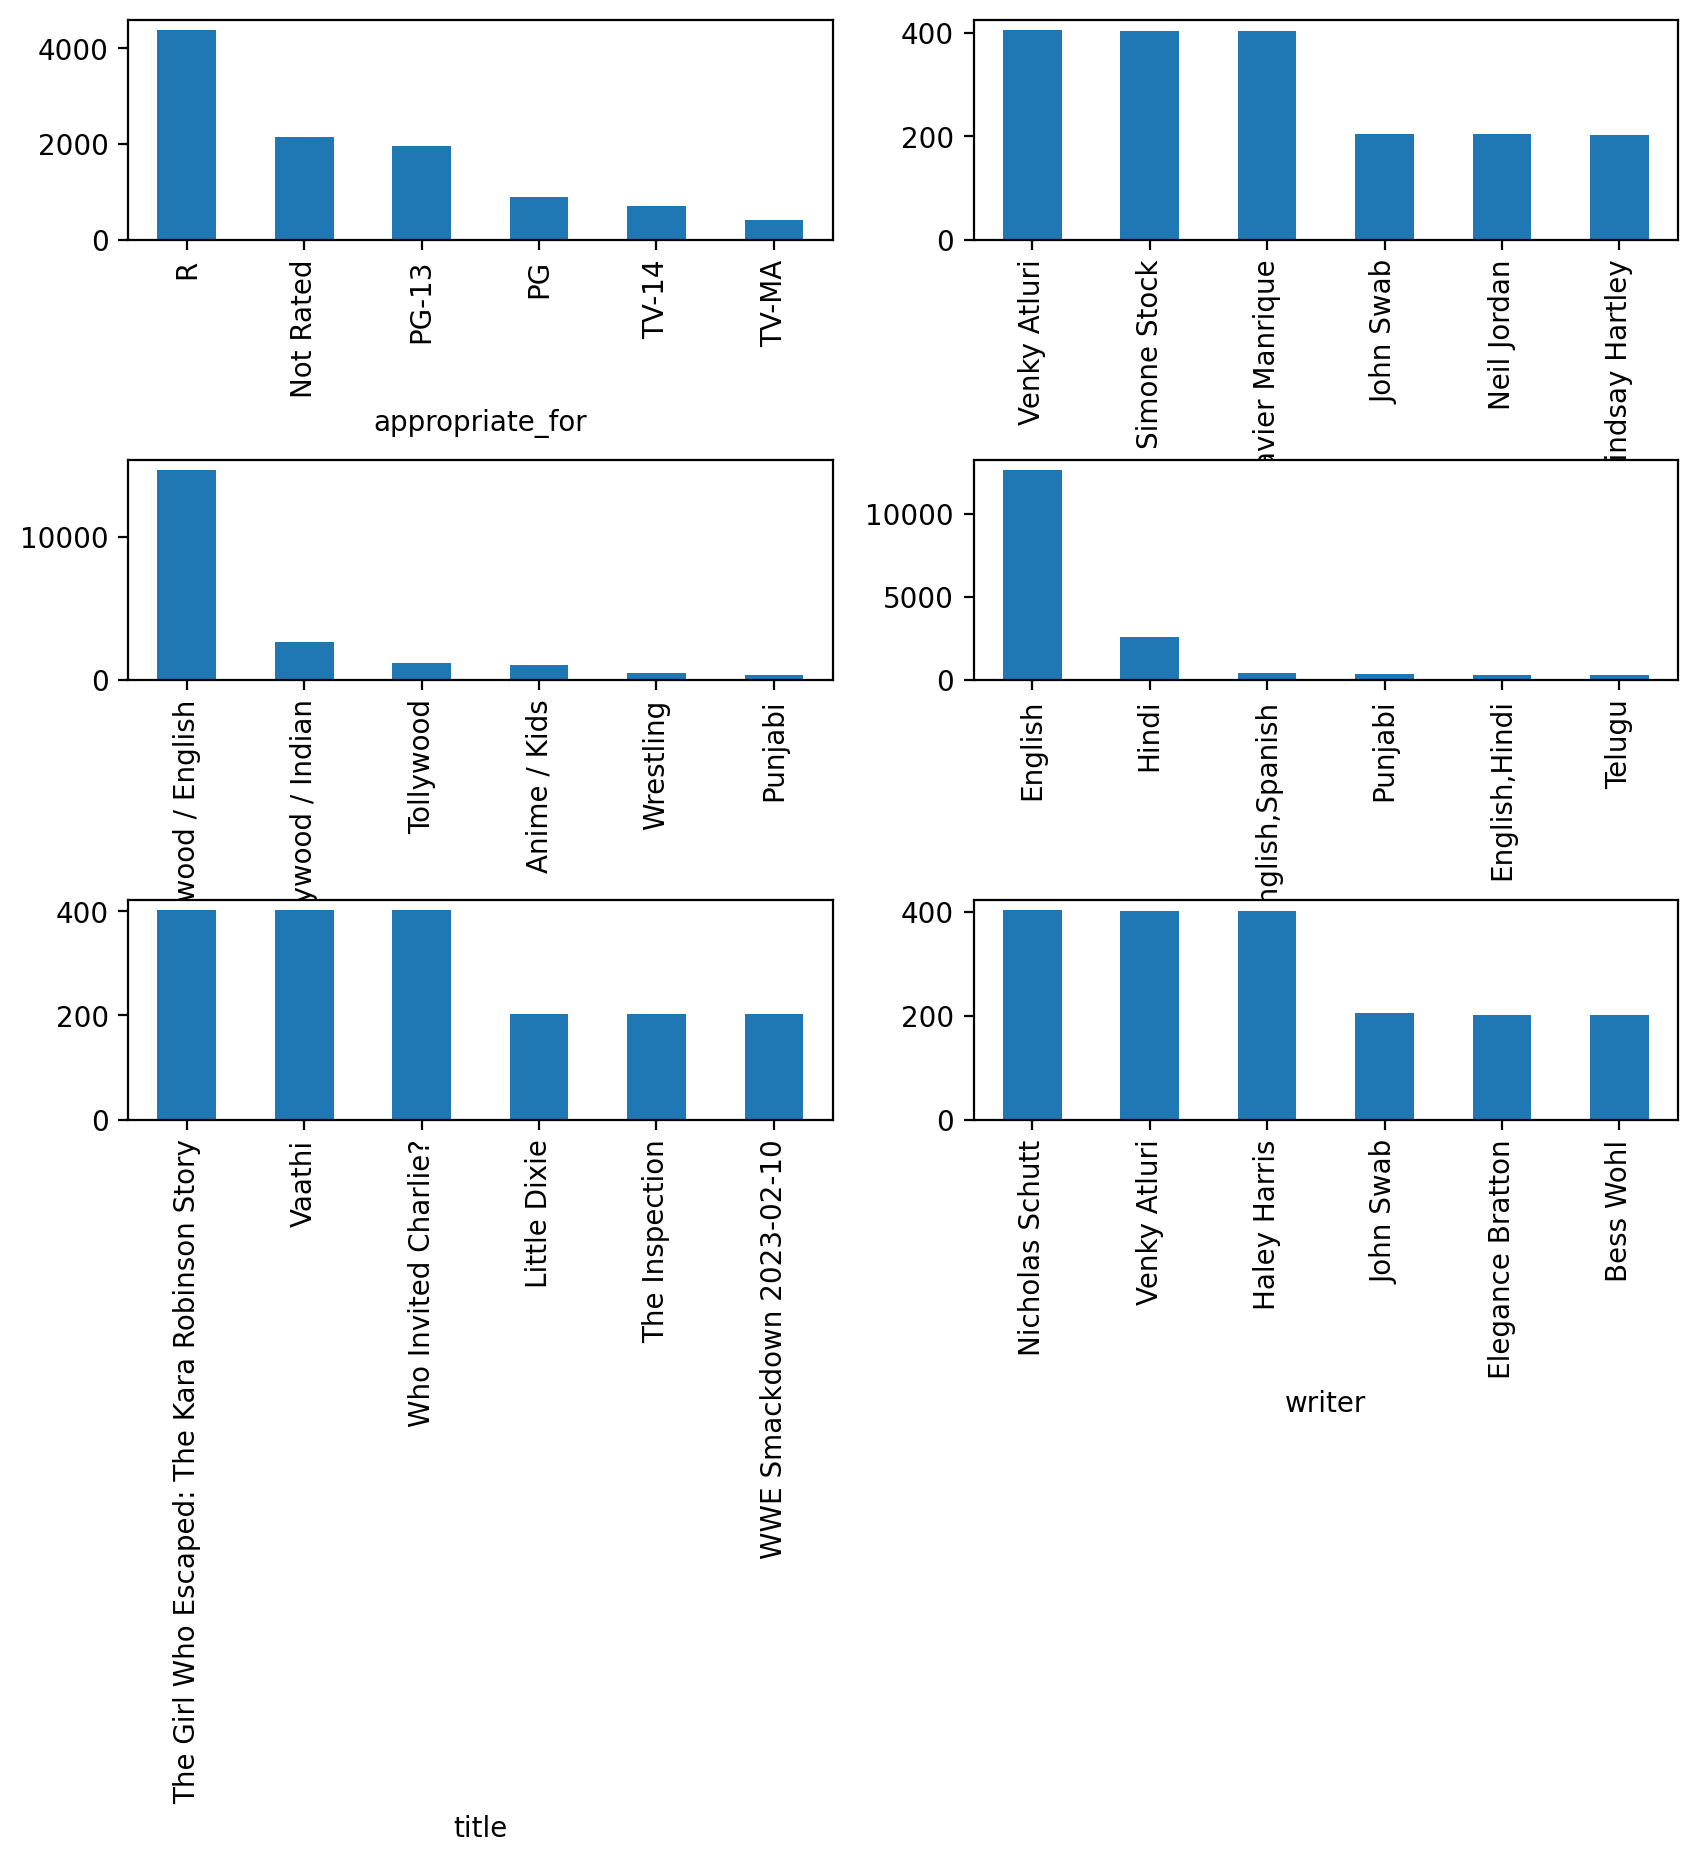

In [71]:
index = 1
plt.figure(figsize=(10,10), dpi=200).subplots_adjust(hspace=1)
plt.figure(1)
col = 2
row = int(len(nominal) / col) + 1
for i in nominal:
    plt.subplot(row, col, index)
    index += 1
    sum = 6
    dataset[i].value_counts().head(sum).plot.bar()


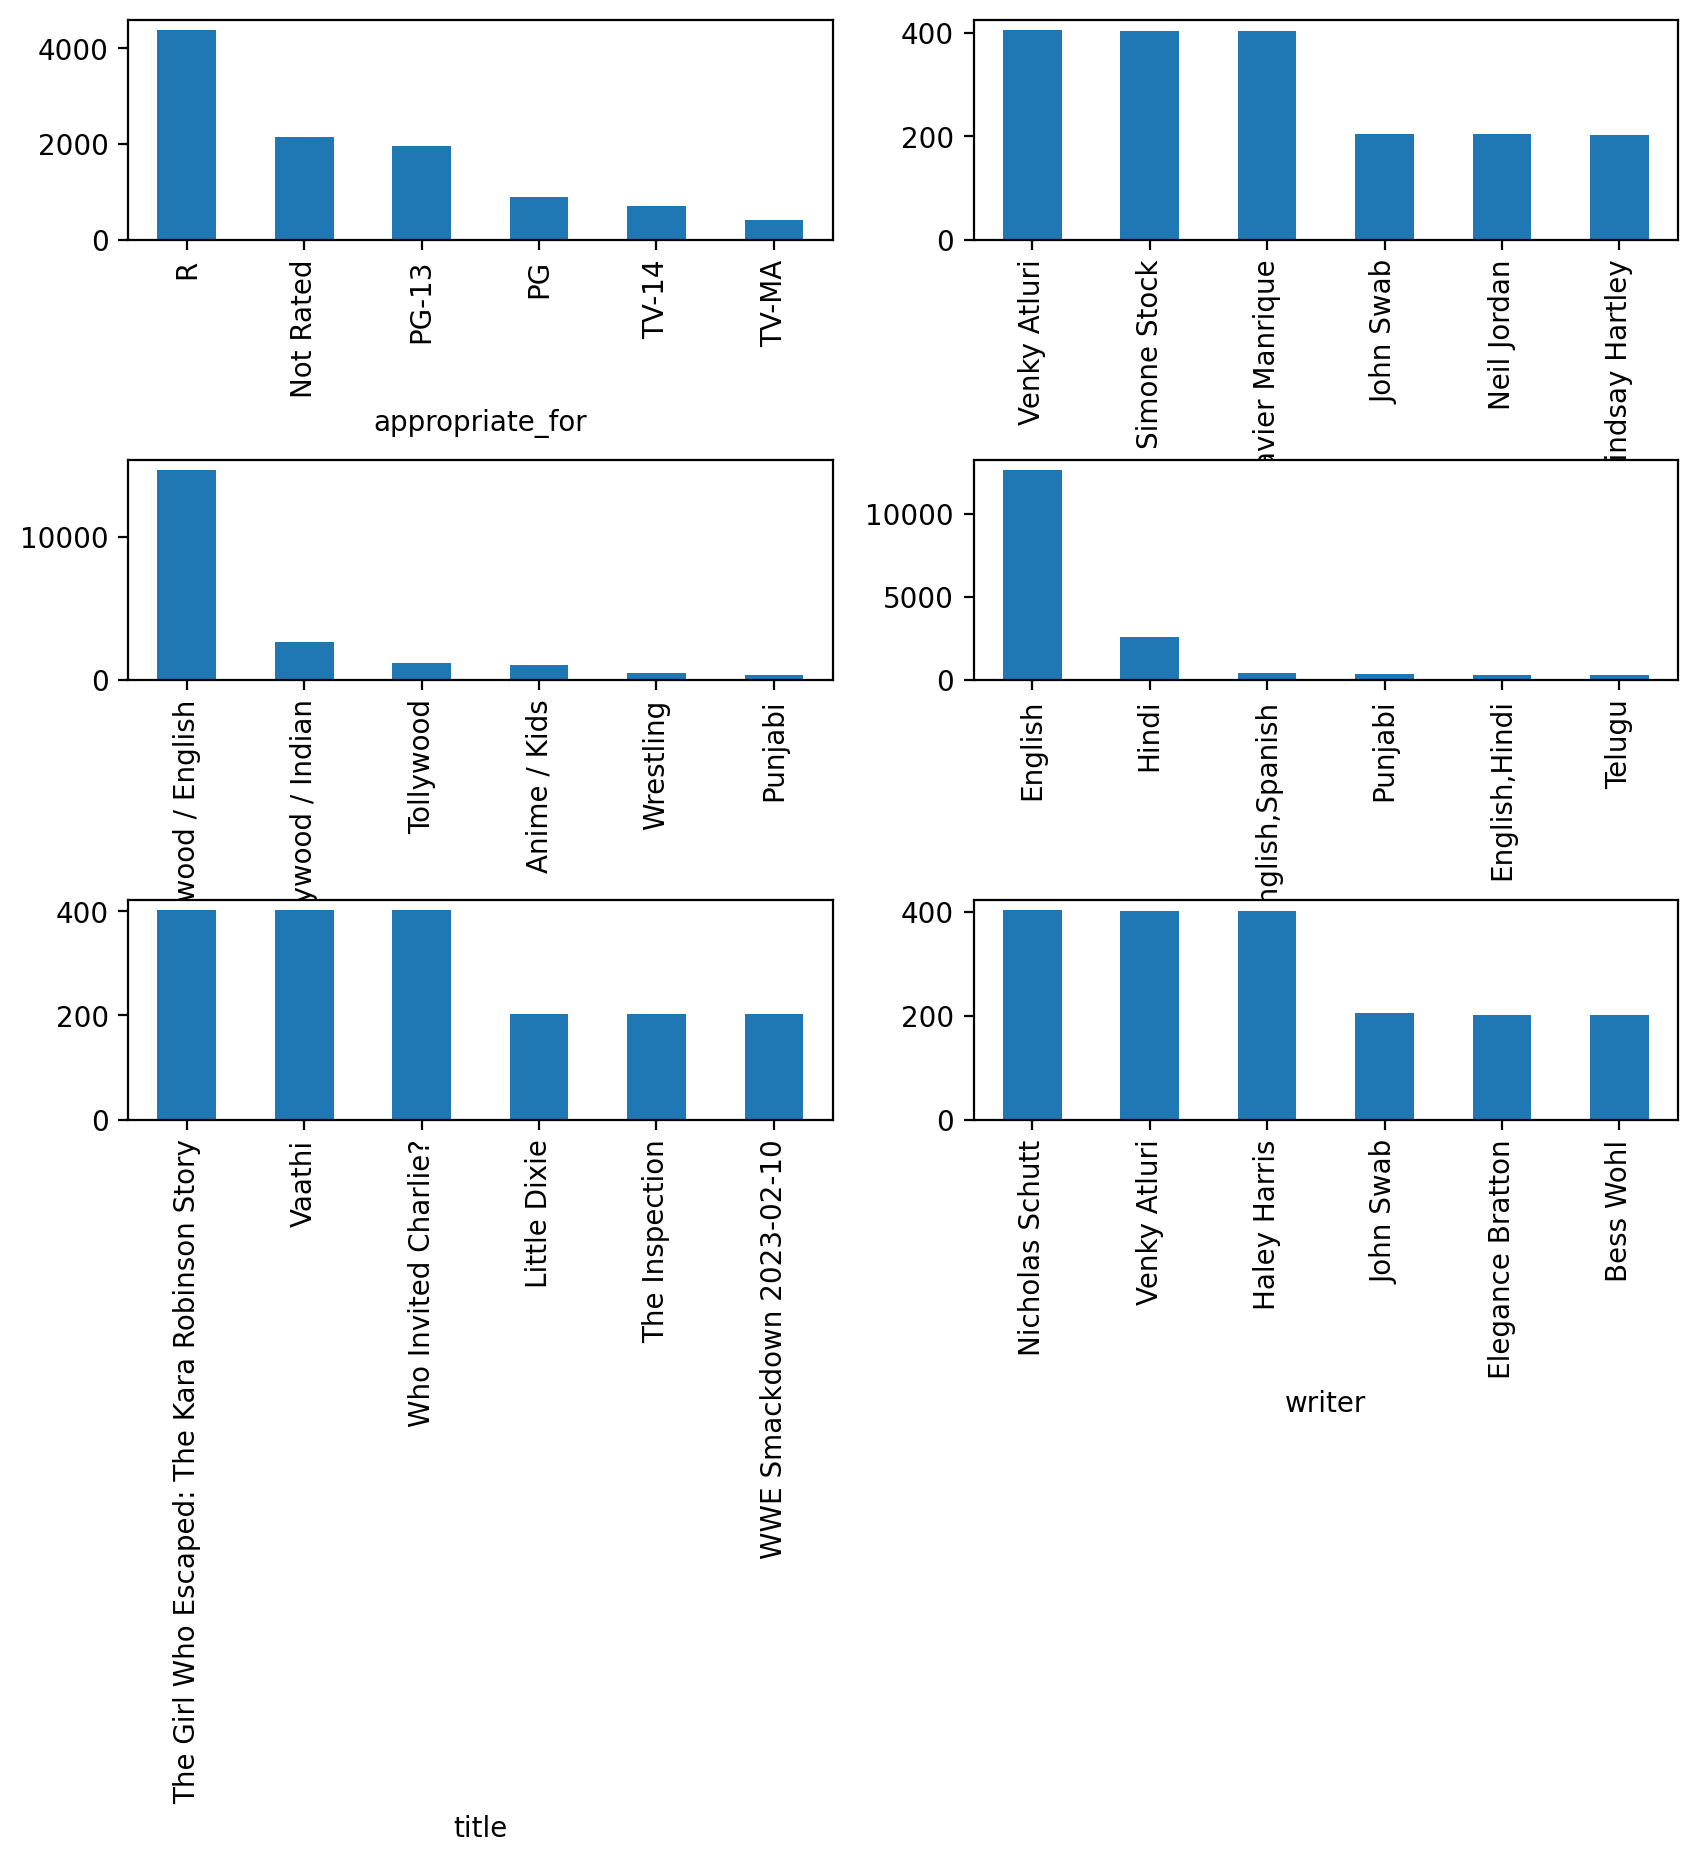

In [72]:
index = 1
plt.figure(figsize=(10,10), dpi=200).subplots_adjust(hspace=1)
plt.figure(1)
col = 2
row = int(len(nominal) / col) + 1
for i in nominal:
    plt.subplot(row, col, index)
    index += 1
    sum = 6
    new_data[i].value_counts().head(sum).plot.bar()

### 相关关系填补-使用Random Forest Imputation

In [82]:
from sklearn.ensemble import RandomForestRegressor
_dataset = dataset.copy(deep=True)

# 创建新的数据映射，仅包含 'run_time' 和 'downloads' 列，并删除包含缺失值的行
data_map = dataset[['run_time', 'downloads']].dropna()
# 创建随机森林回归模型
rfr_1 = RandomForestRegressor(random_state=0, n_estimators=200, n_jobs=-1)
# 准备训练数据
X_train = data_map['run_time'].values.reshape(-1, 1)
y_train = data_map['downloads'].values
# 拟合随机森林回归模型
rfr_1.fit(X_train, y_train)
# 选择包含缺失值的行，并使用随机森林回归模型进行预测
missing_data = dataset[(dataset['run_time'].isnull()) & (dataset['downloads'].notnull())]
X_test = missing_data['downloads'].values.reshape(-1, 1)
predicted_values = rfr_1.predict(X_test)
# 将预测值填充到原始数据集中
dataset.loc[(dataset['run_time'].isnull()) & (dataset['downloads'].notnull()), 'run_time'] = predicted_values
# 打印填充后的数据集
dataset.head()

,imdb_rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer,old_posted_date,old_release_date
0,4.80,R,John Swab,304.00,372092,Hollywood / English,English,2023-02-20,2023-01-28,105.00,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.00,John Swab,"20 Feb, 2023",Jan 28 2023
1,6.40,TV-PG,Paul Ziller,73.00,372091,Hollywood / English,English,2023-02-20,2023-02-05,84.00,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.00,John Christian Plummer,"20 Feb, 2023",Feb 05 2023
2,5.20,R,Ben Wheatley,1427.00,343381,Hollywood / English,"English,Hindi",2021-04-20,2021-06-18,107.00,As the world searches for a cure to a disastro...,In the Earth,14419.00,Ben Wheatley,"20 Apr, 2021",Jun 18 2021
3,8.10,NaN,Venky Atluri,1549.00,372090,Tollywood,Hindi,2023-02-20,2023-02-17,139.00,The life of a young man and his struggles agai...,Vaathi,4878.00,Venky Atluri,"20 Feb, 2023",Feb 17 2023
4,4.60,NaN,Shaji Kailas,657.00,372089,Tollywood,Hindi,2023-02-20,2023-01-26,122.00,A man named Kalidas gets stranded due to the p...,Alone,2438.00,Rajesh Jayaraman,"20 Feb, 2023",Jan 26 2023


* 五数对比

In [74]:
# 提取 numeric 列的数据
numeric_data = dataset[numeric]
five_number_summary = numeric_data.describe().loc[['min', '25%', '50%', '75%', 'max']]
summary_table = pd.DataFrame(five_number_summary, columns=numeric)
print(summary_table)
# 提取 numeric 列的数据
numeric_data = new_data[numeric]
five_number_summary = numeric_data.describe().loc[['min', '25%', '50%', '75%', 'max']]
summary_table = pd.DataFrame(five_number_summary, columns=numeric)
print(summary_table)

     imdb_rating  downloads  run_time      views
min         1.10       0.00      2.00     667.00
25%         4.80     855.50     91.00    7571.50
50%         5.70    2716.00    102.00   15222.00
75%         6.60   10070.00    129.00   36571.00
max         9.90  391272.00 119596.30 1638533.00
     imdb_rating  downloads  run_time      views
min         1.10       0.00      2.00     667.00
25%         4.80     855.50     90.00    7571.00
50%         5.70    2716.00    100.00   15221.50
75%         6.60   10070.00    117.00   36569.50
max         9.90  391272.00    321.00 1638533.00


* 修改后的标称属性

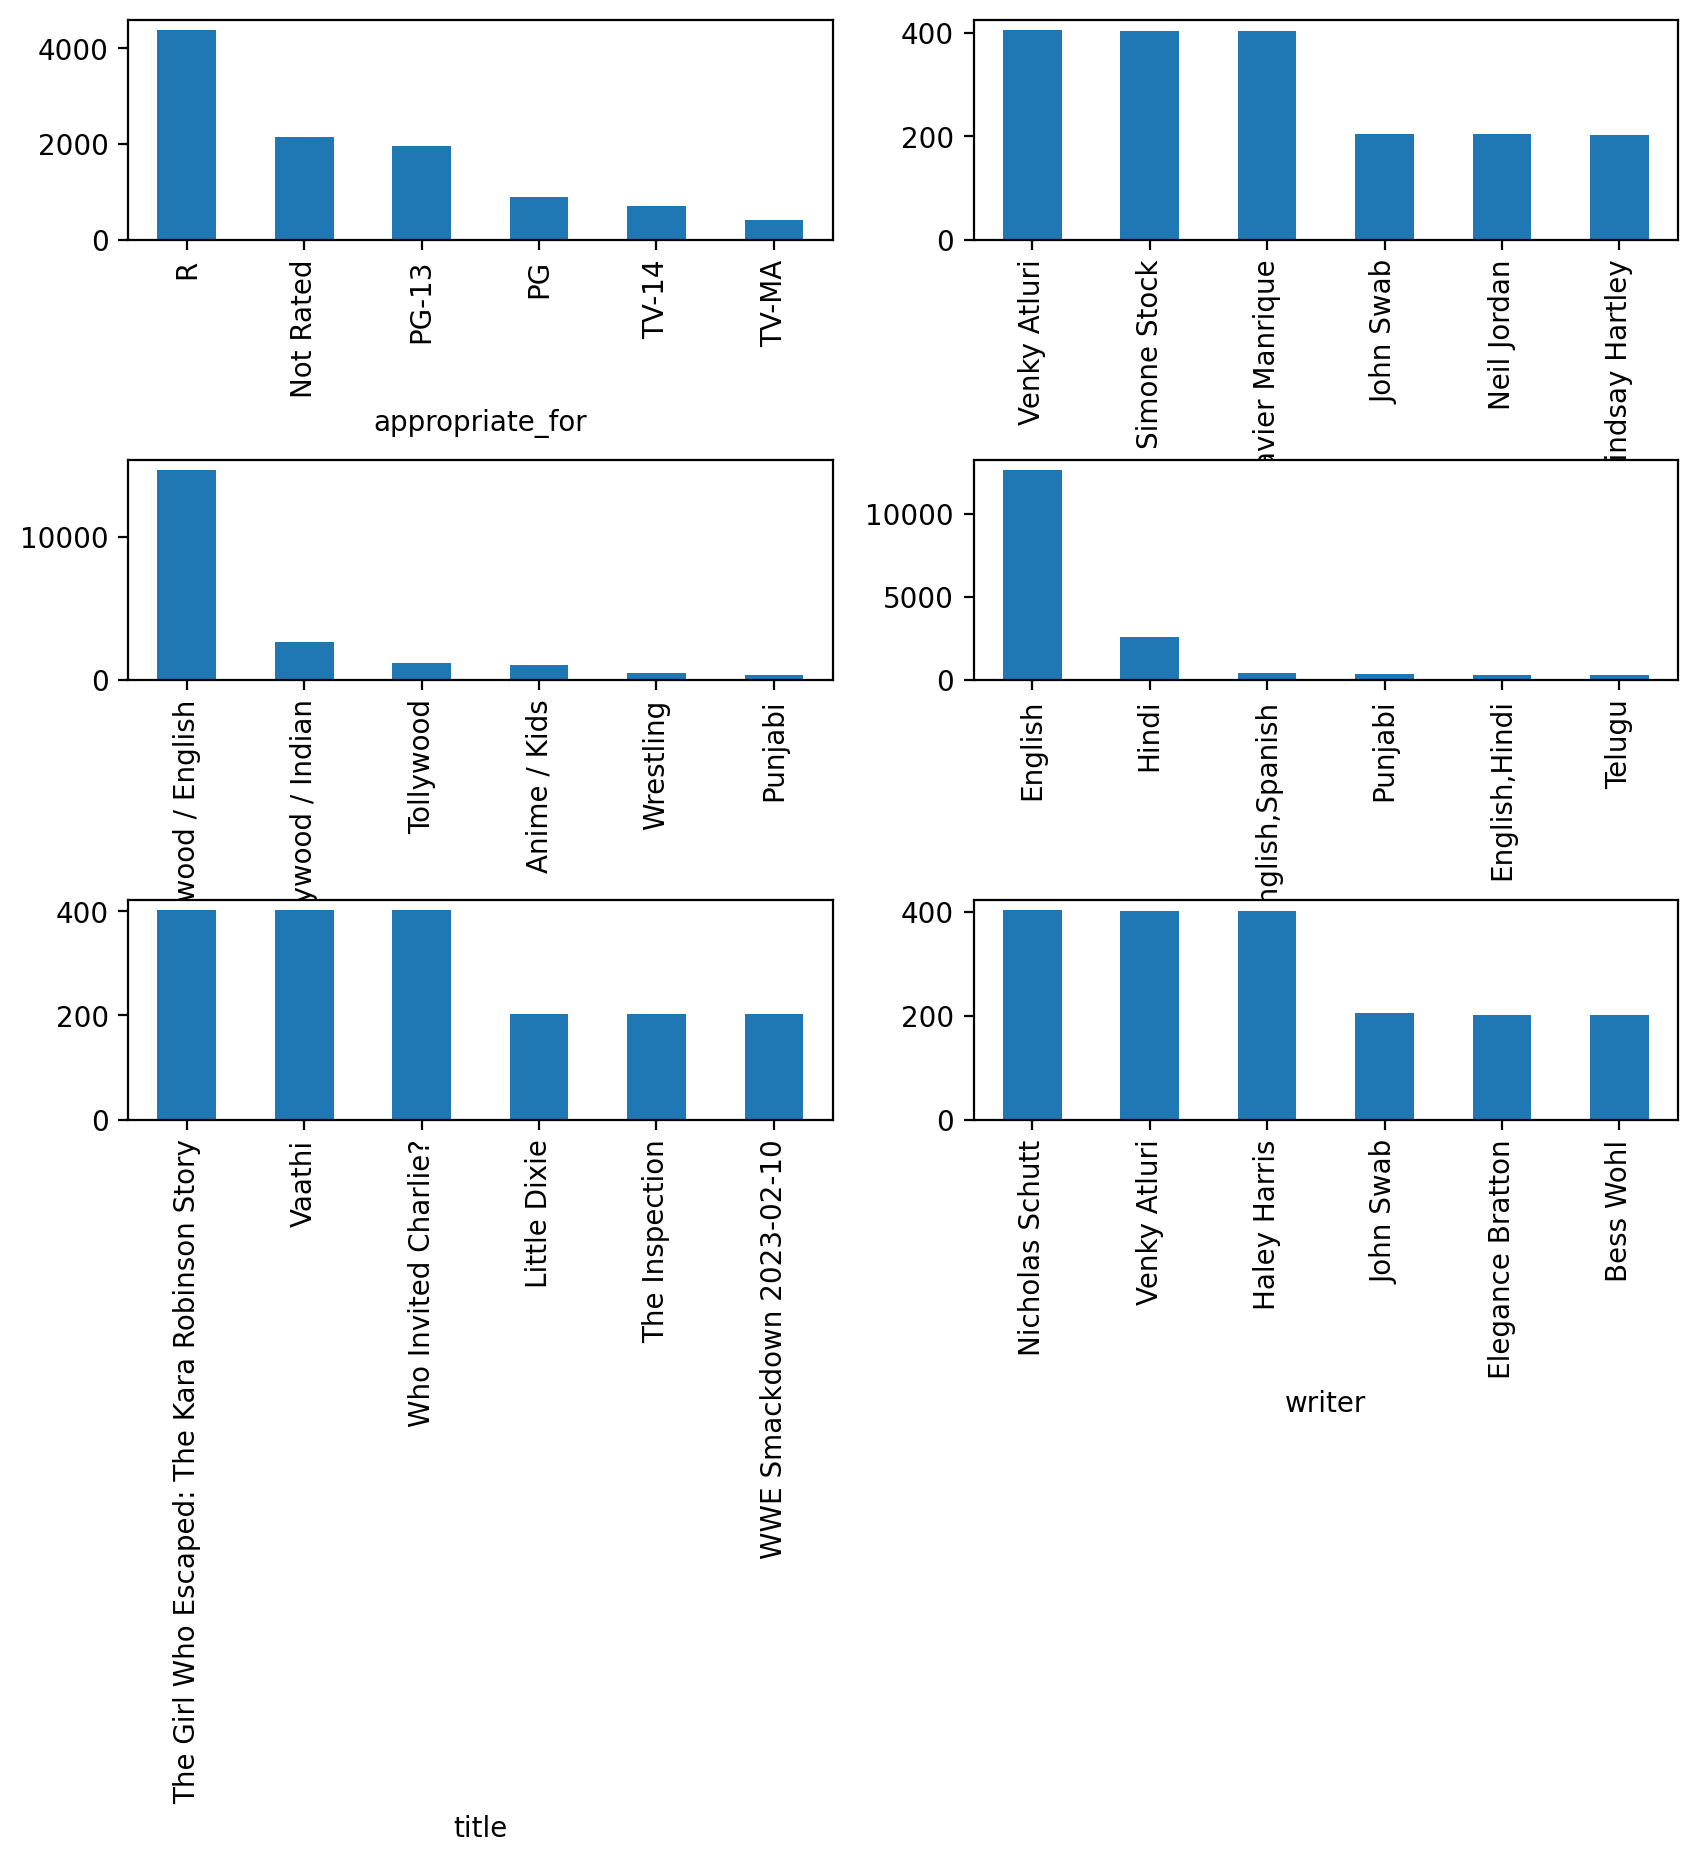

In [75]:
index = 1
plt.figure(figsize=(10,10), dpi=200).subplots_adjust(hspace=1)
plt.figure(1)
col = 2
row = int(len(nominal) / col) + 1
for i in nominal:
    plt.subplot(row, col, index)
    index += 1
    sum = 6
    new_data[i].value_counts().head(sum).plot.bar()